In [22]:
#package imported 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.optimize as fitter
from matplotlib.widgets import Slider, Button, RadioButtons

#read the file
anomaly_file = open("Land_and_Ocean_complete.txt", "r")
for i in range(77):
    anomaly_file.readline()

y_m = [] #columns to store the time
monthly = [] #columns for monthly anomaly and its uncertainty
annually = [] #columns for annually anomaly and its uncertainty
five_y = [] #columns for five years anomaly and its uncertainty
ten_y = [] #columns for ten years anomaly and its uncertainty
twenty_y = [] #columns for twenty years anomaly and its uncertainty

#pick up data from file
index = 77 #starting line for pick-up
for line in anomaly_file:
    #we only need the data in the first data set
    if index > 2126:
        break
        
    tokens = line.split()
    y_m.append([int(tokens[0]), int(tokens[1])])
    monthly.append([float(tokens[2]), float(tokens[3])])
    annually.append([float(tokens[4]), float(tokens[5])])
    five_y.append([float(tokens[6]), float(tokens[7])])
    ten_y.append([float(tokens[8]), float(tokens[9])])
    twenty_y.append([float(tokens[10]), float(tokens[11])])
    index += 1

#store all the data in the form of numpy arrays
time = np.array(y_m)
mon = np.array(monthly)
ann = np.array(annually) 
fiv = np.array(five_y)
ten = np.array(ten_y)
twe = np.array(twenty_y)

#make a time-axis to for ploting conveniently
#year = time[:, 0]
#month = time[:, 1]
#time_axis = year*100 + month


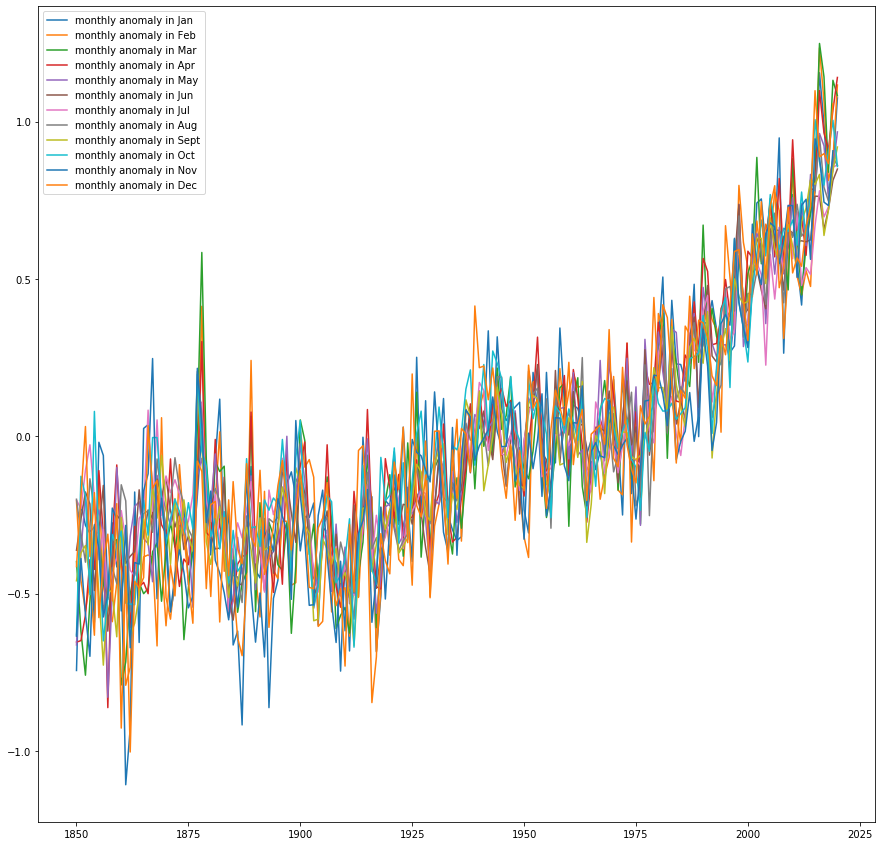

In [23]:
#plot for each month
y_m_mon = np.concatenate([y_m, mon], axis = 1)
plt.figure(figsize=(15,15))
#Jan
mon_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
for i in range(1,13):
    temp = y_m_mon[y_m_mon[:,1] == i, :]
    x = temp[:, 0]
    y = temp[:, 2]
    err = temp[:, 2]
    plt.plot(x, y, label= "monthly anomaly in {}".format(mon_list[i-1]))
    plt.legend()
plt.show()

parameter for linear model:
a=0.0007+/-0.0000
b=-0.8589+/-0.0070 

Chi-squared for linear model:
chi^2 = 11513.78
chi^2/d.f.=5.62e+00 

correlation coefficient = 0.82143


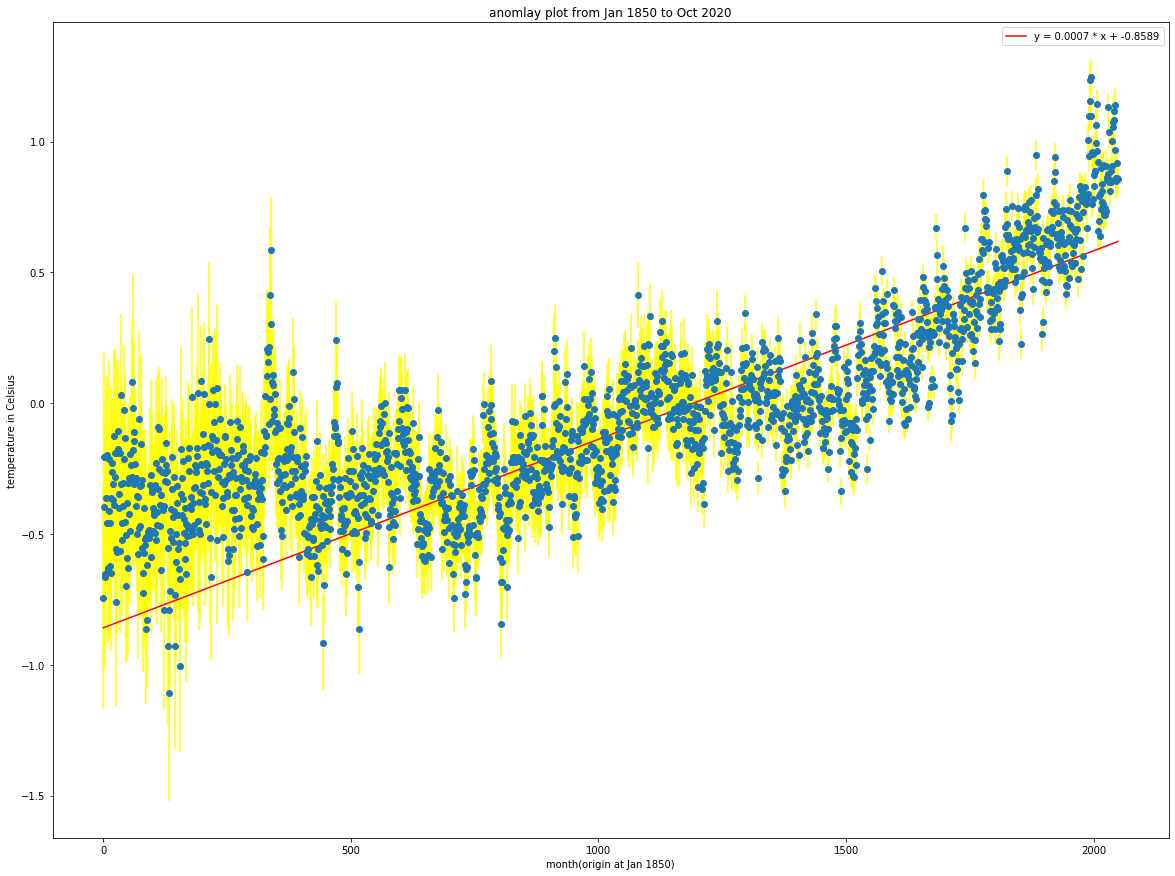

In [24]:
#plot for overall monthly anomaly data for analyzing 
plt.figure(figsize=(20,15))
anom_m = mon[:, 0]
err_m = mon[:, 1]
plt.errorbar(range(len(anom_m)), anom_m, xerr= 0, yerr= err_m, fmt = "o", ecolor = "yellow")
plt.title("anomlay plot from Jan 1850 to Oct 2020")
plt.ylabel("temperature in Celsius")
plt.xlabel("month(origin at Jan 1850)")


#Then use linear model and exponential model to fit the data
xdata = range(len(anom_m))
ydata = anom_m
#use linear model
def l_model(x,a,b):
    return a*x+b
par0 = np.array([1.0, 0.0])
par, cov = fitter.curve_fit(l_model, xdata, ydata, p0=par0, sigma=err_m, absolute_sigma=True)
print("parameter for linear model:")
print ('a={0:6.4f}+/-{1:5.4f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.4f}+/-{1:5.4f}'.format(par[1],np.sqrt(cov[1,1])), "\n")

#Calculate chi-squared and reduced chi-squared for linear model
chi_squared = np.sum(((l_model(xdata, *par)-ydata)/err_m)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print("Chi-squared for linear model:")
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2e}'.format(reduced_chi_squared), "\n")
plt.plot(xdata, l_model(xdata, *par), "r", label = "y = {:.4f} * x + {:.4f}".format(*par))
plt.legend()

#calculate the correlation coef
result = np.corrcoef(xdata,ydata)
print("correlation coefficient = {:.5f}".format(result[0,1]))

plt.show()

parameter for linear model in the period 2000-2020:
a=0.0017+/-0.0001
b=0.4642+/-0.0075 



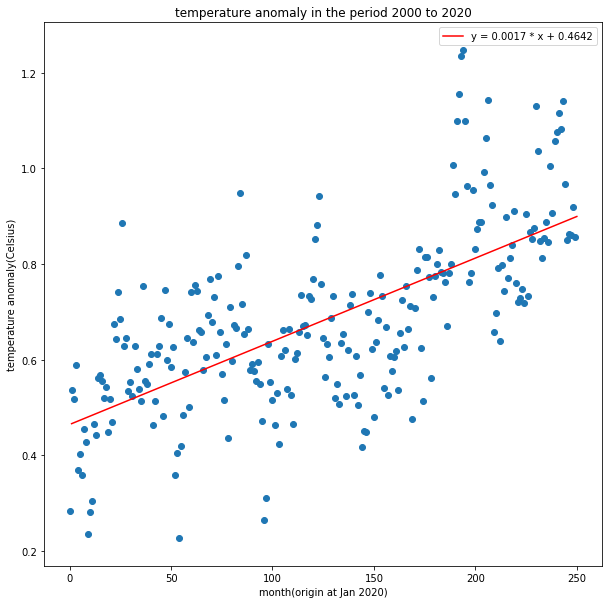

In [29]:
#extract data from 2000 to 2020
y_m_mon = np.concatenate([y_m, mon], axis = 1)
temp = y_m_mon[y_m_mon[:,0] >= 2000, :] #data from 2000 to 2020
plt.figure(figsize = (10,10))
plt.scatter(range(len(temp)) ,temp[:, 2])
plt.title("temperature anomaly in the period 2000 to 2020")
plt.xlabel("month(origin at Jan 2020)")
plt.ylabel("temperature anomaly(Celsius)")


xdata = range(len(temp))
ydata = temp[:,2]
sigma = temp[:,3]
#use linear model
def l_model(x,a,b):
    return a*x+b
par0 = np.array([1.0, 0.0])
par, cov = fitter.curve_fit(l_model, xdata, ydata, p0=par0, sigma=sigma, absolute_sigma=True)
print("parameter for linear model in the period 2000-2020:")
print ('a={0:6.4f}+/-{1:5.4f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.4f}+/-{1:5.4f}'.format(par[1],np.sqrt(cov[1,1])), "\n")

x = np.linspace(1, len(temp), 500)
y = l_model(x, *par)
plt.plot(x, y, "r", label = "y = {:.4f} * x + {:.4f}".format(*par))
plt.legend()
plt.show()

In [76]:
#attempt to use power model, but fail

xdata = np.array(range(1, len(anom_m)+1))
ydata = anom_m
def p_model(x,a,b,c):
    return a*pow(x,b) + c
par0_p = np.array([1.0, 1.0, 1.0])
par_p, cov_p = fitter.curve_fit(p_model, xdata, ydata, p0=par0_p, sigma = err_m, absolute_sigma=True)
print("parameter for exponential model:")
print ('a={0:6.4f}+/-{1:5.4f}'.format(par_e[0],1))
print ('b={0:6.4f}+/-{1:5.4f}'.format(par_e[1],1))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [85]:
#attempt to use exponential model, but fail
xdata = np.array(range(1, len(anom_m)+1), dtype=np.float128)
ydata = np.array(anom_m, dtype=np.float128)
def e_model(x,a,b):
    return a*np.exp(b*x)
par0_e = np.array([1.0, 1.0])
par_e, cov_e = fitter.curve_fit(e_model, xdata, ydata, p0=par0_e, sigma = err_m, absolute_sigma=True)
print("parameter for exponential model:")
print ('a={0:6.4f}+/-{1:5.4f}'.format(par_e[0],1))
print ('b={0:6.4f}+/-{1:5.4f}'.format(par_e[1],1))


parameter for exponential model:
a=1.0000+/-1.0000
b=1.0000+/-1.0000


<ipython-input-85-7b24b93fe856>:5: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x)
